# **Esquema del Plan de Trabajo**

**Título del Proyecto**

Proyecto Final: Telecomunicaciones - Identificar Operadores Ineficaces

ETAPA 1. Descripción del Proyecto

- Cargar librerías
- Cargar los archivos de datos
- Imprimir la información general/resumida sobre el Dataframe
- Imprimir una muestra de los datos

ETAPA 2. Preprocesamiento de los datos

- Tratamiento de los valores ausentes
- Preparar los datos de las columnas al tipo de campo ideal
- Revisar y eliminar duplicados
- Enriquecer los datos a partir de las columnas de tipo DATETIME

ETAPA 3. Análisis exploratorio

- Métricas de Medición
- Análisis de Cohortes
- Pruebas de hipótesis
- Pruebas de correlación

ETAPA 4. Escribe una conclusión
- Haz recomendaciones básicas a los supervisores y las supervisores sobre el trabajo de los operadores menos eficaces

----

**Justificar porque no hice 'Análisis de Cohortes' en mi proyecto, punto integrado en mi plan de trabajo en la etapa 3**


El análisis de cohortes es una técnica que agrupa a los usuarios en 'cohortes' (grupos) basados en un evento compartido durante un período de tiempo específico, y luego analiza su comportamiento a lo largo del tiempo. 

¿Por qué no es apropiado para mi proyecto?

- Mi proyecto se centra en identificar y analizar el rendimiento de los operadores de telefonía, no en el comportamiento a largo plazo de los clientes.

- Para realizar un análisis de cohortes efectivo, se necesitan tener eventos de cohortes claros y significativos. En mi caso, los datos se centran en las llamadas y el rendimiento del operador, no en eventos que puedan agrupar a los clientes en cohortes relevantes.

- Mis datos son de naturaleza transaccional, registrando llamadas individuales y el rendimiento del operador en tiempo real.

- El objetivo principal de mi proyecto es identificar operadores ineficaces basándose en métricas de rendimiento como llamadas perdidas, tiempo en espera y llamadas salientes. 
    
    

**Enlace google drive presentación PDF**
https://drive.google.com/file/d/14yEGFhLVb6gwMxiVk0l6y57LDCwpWo7e/view?usp=drive_link

**ETAPA 1. Descripción del Proyecto**

El servicio de telefonía virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.

- Lleva a cabo el análisis exploratorio de datos.
- Identificar operadores ineficaces.
- Prueba las hipótesis estadísticas.

**Para iniciar se deben cargar todas las librerías que se van a usar durante el proyecto.**

In [446]:
# Cargar todas las librerías
from scipy import stats as stats
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

**En este sección reuní la totalidad de los dataframe, la función .read_csv permite leer cada uno de los archivos cargados.**

In [447]:
# Cargar los archivos de datos de los diferentes DataFrames
df_telecom_dataset = pd.read_csv('./datasets/telecom_dataset_us.csv')
df_telecom_clients = pd.read_csv('./datasets/telecom_clients_us.csv')

**Uso las funciones info() y head() para explorar visualmente cada dataframe con el fin de analizar que campos tiene, sus características, y los detalles que no sean funcionales corregir, para hacer un análisis acorde e ideal a lo solicitado.**

**1. Conjunto de datos**

In [448]:
#Imprimir la información general/resumida sobre el DataFrame conjunto de datos
df_telecom_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB


In [449]:
# Imprimir una muestra de los datos para el conjunto de datos
df_telecom_dataset.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,NaN,True,2,0,4
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25


**2. Clientes**

In [450]:
#Imprimir la información general/resumida sobre el DataFrame clientes
df_telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB


In [451]:
# Imprimir una muestra de los datos para los clientes
df_telecom_clients.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


**ETAPA 2. Preprocesamiento de los datos**

**El objetivo aquí es preparar los datos para que sean analizados. Para ello hay que resolver cualquier problema que haya: identificar los registros duplicados y en su caso si fuera necesario eliminar dichos registros, identificar los valores ausentes y en su caso completar dichos valores,  verificar y en su caso corregir los tipos de datos de cada columna, y finalmente enriquecer ambas estructuras de datos a partir de la columna de tipo DATETIME.**

**1. Conjunto de datos**

**ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS DEL DATAFRAME CONJUNTO DE DATOS**

a) Revisar y eliminar duplicados.

b) Calcular el número de valores ausentes.

c) Preparar los datos de la columna DATE que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

d) Preparar los datos de la columna INTERNAL que incluye: convertir de tipo object a tipo bool la columna.

e) Preparar los datos de la columna OPERATOR ID que incluye: convertir de tipo float a tipo int64 la columna.

f) Enriquecer los datos a partir de la columna DATE para generar las columnas RECOVERY MONTH y RECOVERY DATE.


**Revisar y eliminar duplicados**

In [452]:
# Mostrar el total de filas del dataFrame original
df_telecom_dataset.shape[0]

53902

In [453]:
# Revisar si hay valores duplicados en el dataframe filtrado 
df_telecom_dataset.duplicated().sum()

4900

In [454]:
# Calcular el porcentaje de filas duplicadas 
print("El porcentaje de filas duplicadas es: " +
      f"{(df_telecom_dataset.duplicated().sum() / df_telecom_dataset.shape[0]) * 100:.2f}%")

El porcentaje de filas duplicadas es: 9.09%


In [455]:
# Crear un dataframe filtrado que no incluya valores duplicados
df_telecom_dataset_cleaned = df_telecom_dataset[~df_telecom_dataset.duplicated()].reset_index(
    drop=True)

In [456]:
# Imprimir la información general/resumida actualizada
df_telecom_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49002 entries, 0 to 49001
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              49002 non-null  int64  
 1   date                 49002 non-null  object 
 2   direction            49002 non-null  object 
 3   internal             48892 non-null  object 
 4   operator_id          41546 non-null  float64
 5   is_missed_call       49002 non-null  bool   
 6   calls_count          49002 non-null  int64  
 7   call_duration        49002 non-null  int64  
 8   total_call_duration  49002 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.0+ MB


**Tratamiento de los valores ausentes**

*Como se puede observar en el dataframe objeto de estudio se tienen valores ausentes en dos de las nueve columnas que conforma esta estructura de datos, para ser exactos son:*  

- **internal** con 110 valores ausentes que corresponden al 0.22% del total de filas del dataframe.
- **operator_id**  con 7456 valores ausentes que corresponden 15.22% del total de filas del dataframe.

El manejo que he decidido dar a estas columnas con valores ausentes es NO considerar estos datos para mi análisis por lo siguiente:

- **internal** es un campo de tipo booleano por lo tanto NO SE pueden imputar, si se efectua dicho procedimiento en función de un criterio (por ejemplo, la moda) esto podría crear una interpretación errónea. Es posible que el valor imputado no refleje la realidad de la variable y, por lo tanto, pueda influir en la precisión del análisis que se aplique posteriormente. Finalmente el imputar el valor True o False con la moda (valor más frecuente) puede resultar en la sobrerepresentación de un valor, distorsionando así los patrones reales de los datos.

- **operator_id** imputar valores ausentes en columnas de identificación puede conducir a resultados erróneos, ya que los IDs son únicos y no se pueden inferir o calcular de manera precisa. NO se deben de imputar valores ausentes en columnas de identificación, ya que cualquier valor imputado sería arbitrario y no representativo de la realidad.

Concluyó comentando que en nuestro caso no se puede investigar por qué esos valores están ausentes. Pero en la vida laboral a veces estos valores pueden revelar problemas sistemáticos en la recolección de datos, es decir, errores que ocurren en un proceso de recopilación de la información. 

**Por todo lo comentado anteriormente y para NO INCLUIR estos valores ausentes realizaré un filtro que permita actualizar el dataframe en cuestión para usar nada más los datos que están libres de este tipo de valores.** 

In [457]:
# Mostrar el total de filas del dataFrame limpio
df_telecom_dataset_cleaned.shape[0]

49002

In [458]:
# Calcular el número de valores ausentes
df_telecom_dataset_cleaned.isna().sum()

user_id                   0
date                      0
direction                 0
internal                110
operator_id            7456
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64

In [459]:
# Calcular el porcentaje de valores ausentes para la columna 'internal'
print("El porcentaje de valores ausentes en la columna 'internal' es: " +
      f"{(df_telecom_dataset_cleaned['internal'].isna().sum() / df_telecom_dataset_cleaned.shape[0]) * 100:.2f}%")

# Calcular el porcentaje de valores ausentes para la columna 'operator_id'
print("El porcentaje de valores ausentes en la columna 'operator_id' es: " +
      f"{(df_telecom_dataset_cleaned['operator_id'].isna().sum() / df_telecom_dataset_cleaned.shape[0]) * 100:.2f}%")

El porcentaje de valores ausentes en la columna 'internal' es: 0.22%
El porcentaje de valores ausentes en la columna 'operator_id' es: 15.22%


In [460]:
# Crear un dataframe filtrado que no incluya los valores ausentes
df_telecom_dataset_cleaned_filtered = df_telecom_dataset_cleaned.dropna(subset=['internal', 'operator_id']).reset_index(drop=True)

In [461]:
# Imprimir la información general/resumida actualizada
df_telecom_dataset_cleaned_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41491 entries, 0 to 41490
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              41491 non-null  int64  
 1   date                 41491 non-null  object 
 2   direction            41491 non-null  object 
 3   internal             41491 non-null  object 
 4   operator_id          41491 non-null  float64
 5   is_missed_call       41491 non-null  bool   
 6   calls_count          41491 non-null  int64  
 7   call_duration        41491 non-null  int64  
 8   total_call_duration  41491 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 2.6+ MB


**Preparar los datos de la columna DATE**

In [462]:
# Convertir de tipo object a tipo datetime64[ns] la columna y ajustar la zona horaria
df_telecom_dataset_cleaned_filtered['date'] = df_telecom_dataset_cleaned_filtered['date'].apply(lambda x: pd.to_datetime(
    x, format='ISO8601', utc=True).tz_convert('US/Eastern'))

In [463]:
# Imprimir la información general/resumida actualizada
df_telecom_dataset_cleaned_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41491 entries, 0 to 41490
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                     
---  ------               --------------  -----                     
 0   user_id              41491 non-null  int64                     
 1   date                 41491 non-null  datetime64[ns, US/Eastern]
 2   direction            41491 non-null  object                    
 3   internal             41491 non-null  object                    
 4   operator_id          41491 non-null  float64                   
 5   is_missed_call       41491 non-null  bool                      
 6   calls_count          41491 non-null  int64                     
 7   call_duration        41491 non-null  int64                     
 8   total_call_duration  41491 non-null  int64                     
dtypes: bool(1), datetime64[ns, US/Eastern](1), float64(1), int64(4), object(2)
memory usage: 2.6+ MB


**Preparar los datos de la columna INTERNAL**

In [464]:
# Convertir de tipo object a tipo bool la columna
df_telecom_dataset_cleaned_filtered['internal'] = df_telecom_dataset_cleaned_filtered['internal'].astype(bool)

In [465]:
# Imprimir la información general/resumida actualizada
df_telecom_dataset_cleaned_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41491 entries, 0 to 41490
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                     
---  ------               --------------  -----                     
 0   user_id              41491 non-null  int64                     
 1   date                 41491 non-null  datetime64[ns, US/Eastern]
 2   direction            41491 non-null  object                    
 3   internal             41491 non-null  bool                      
 4   operator_id          41491 non-null  float64                   
 5   is_missed_call       41491 non-null  bool                      
 6   calls_count          41491 non-null  int64                     
 7   call_duration        41491 non-null  int64                     
 8   total_call_duration  41491 non-null  int64                     
dtypes: bool(2), datetime64[ns, US/Eastern](1), float64(1), int64(4), object(1)
memory usage: 2.3+ MB


**Preparar los datos de la columna OPERATOR ID**

In [466]:
# Convertir de tipo float a tipo int la columna
df_telecom_dataset_cleaned_filtered['operator_id'] = df_telecom_dataset_cleaned_filtered['operator_id'].astype(int)

In [467]:
# Imprimir la información general/resumida actualizada
df_telecom_dataset_cleaned_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41491 entries, 0 to 41490
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype                     
---  ------               --------------  -----                     
 0   user_id              41491 non-null  int64                     
 1   date                 41491 non-null  datetime64[ns, US/Eastern]
 2   direction            41491 non-null  object                    
 3   internal             41491 non-null  bool                      
 4   operator_id          41491 non-null  int32                     
 5   is_missed_call       41491 non-null  bool                      
 6   calls_count          41491 non-null  int64                     
 7   call_duration        41491 non-null  int64                     
 8   total_call_duration  41491 non-null  int64                     
dtypes: bool(2), datetime64[ns, US/Eastern](1), int32(1), int64(4), object(1)
memory usage: 2.1+ MB


**Enriquecer los datos**

In [468]:
# Enriquecer a partir de la columna date por mes
df_telecom_dataset_cleaned_filtered['recovery_month'] = df_telecom_dataset_cleaned_filtered['date'].dt.tz_localize(
    None).dt.to_period('M')

In [469]:
# Enriquecer a partir de la columna date por día y convertir de tipo object a tipo datetime64[ns] la columna
df_telecom_dataset_cleaned_filtered['recovery_date'] = pd.to_datetime(df_telecom_dataset_cleaned_filtered['date'].dt.date)

In [470]:
# Imprimir una muestra de los datos después de enriquecer el dataframe
df_telecom_dataset_cleaned_filtered.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,recovery_month,recovery_date
0,166377,2019-08-04 17:00:00-04:00,out,True,880022,True,3,0,5,2019-08,2019-08-04
1,166377,2019-08-04 17:00:00-04:00,out,True,880020,True,1,0,1,2019-08,2019-08-04
2,166377,2019-08-04 17:00:00-04:00,out,True,880020,False,1,10,18,2019-08,2019-08-04
3,166377,2019-08-04 17:00:00-04:00,out,False,880022,True,3,0,25,2019-08,2019-08-04
4,166377,2019-08-04 17:00:00-04:00,out,False,880020,False,2,3,29,2019-08,2019-08-04


**2. Clientes**

ACCIONES A LLEVAR A CABO EN EL PREPROCESAMIENTO DE LOS DATOS DEL DATAFRAME CLIENTES

a) Calcular el número de valores ausentes.

b) Preparar los datos de la columna DATE START que incluye: convertir de tipo object a tipo datetime64[ns] la columna.

c) Revisar y eliminar duplicados.

d) Enriquecer los datos a partir de la columna DATE START para generar las columnas MONTH START y WEEK START.

**Tratamiento de los valores ausentes**

Para este último conjunto de datos caso de estudio no se procederá a realizar algún tratamiento de los valores ausentes ya que como se puede ver después de generar el código y ejecutar el mismo en la caja CODE de abajo, el dataframe CLIENTES no cuenta con información de este tipo en ninguna de sus columnas.

In [471]:
# Calcular el número de valores ausentes
df_telecom_clients.isna().sum()

user_id        0
tariff_plan    0
date_start     0
dtype: int64

**Preparar los datos de la columna DATE START**

In [472]:
# Convertir de tipo object a tipo datetime64[ns] la columna
df_telecom_clients['date_start'] = pd.to_datetime(df_telecom_clients['date_start'])

In [473]:
# Imprimir la información general/resumida actualizada
df_telecom_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


**Revisar y eliminar duplicados**

In [474]:
# Revisar si hay valores duplicados
df_telecom_clients.duplicated().sum()

0

**Enriquecer los datos**

In [475]:
# Enriquecer a partir de la columna date start por mes
df_telecom_clients['month_start'] = df_telecom_clients['date_start'].dt.to_period('M')

In [476]:
# Imprimir una muestra de los datos después de enriquecer el dataframe
df_telecom_clients.head()

,user_id,tariff_plan,date_start,month_start
0,166713,A,2019-08-15,2019-08
1,166901,A,2019-08-23,2019-08
2,168527,A,2019-10-29,2019-10
3,167097,A,2019-09-01,2019-09
4,168193,A,2019-10-16,2019-10


**ETAPA 3. Análisis exploratorio**

**Responder a las preguntas del negocio**

- **Métricas de Medición**

# ¿Cuál es el número total de llamadas?

In [477]:
# Calcular el número total de llamadas
total_calls = df_telecom_dataset_cleaned_filtered['calls_count'].sum()

print(f"El número total de llamadas es: {total_calls}")

El número total de llamadas es: 702085


In [478]:
# Calcular el número total de llamadas por mes
total_calls_per_month = df_telecom_dataset_cleaned_filtered.groupby('recovery_month').agg({'calls_count':'sum'}).reset_index()

# Imprimir los datos
total_calls_per_month

,recovery_month,calls_count
0,2019-08,35152
1,2019-09,144775
2,2019-10,268992
3,2019-11,253166


In [479]:
# Calcular el número total de llamadas por día
total_calls_per_date = df_telecom_dataset_cleaned_filtered.groupby('recovery_date').agg({'calls_count':'sum'}).reset_index()

# Imprimir una muestra de los datos
total_calls_per_date.head()

,recovery_date,calls_count
0,2019-08-01,19
1,2019-08-02,27
2,2019-08-03,4
3,2019-08-04,183
4,2019-08-05,184


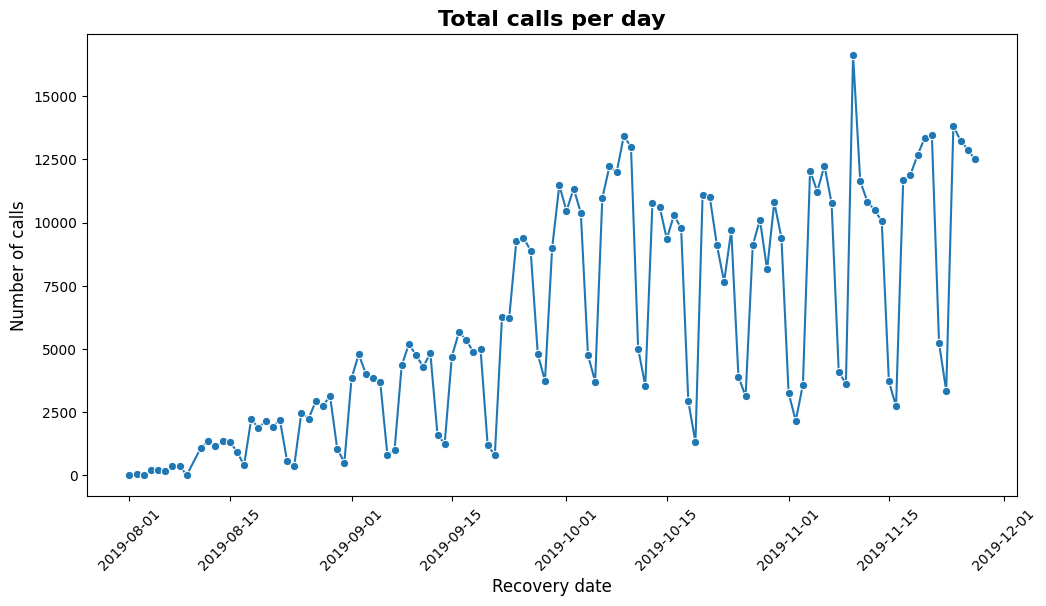

In [480]:
# Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_calls_per_date, x='recovery_date', y='calls_count', marker='o')

plt.title('Total calls per day', fontsize=16, weight='bold')
plt.xlabel('Recovery date', fontsize=12)
plt.ylabel('Number of calls', fontsize=12)
plt.xticks(rotation=45)

plt.show()

**Conclusiones**

- Desde el inicio del período y hasta aproximadamente mediados de octubre, se observa una tendencia general al alza en el número de llamadas diarias. Esto podría indicar un aumento en la demanda o en la actividad durante este tiempo.


- A lo largo de todo el período, hay una considerable variabilidad diaria en el número de llamadas, con picos y valles pronunciados. 


- Se observan varios picos significativos en el número de llamadas, especialmente alrededor de mediados de noviembre, donde el número de llamadas supera las 15,000.


- Finalmente después de alcanzar un pico en noviembre, hay una tendencia a la baja en el número de llamadas hacia finales de noviembre y principios de diciembre, aunque con fluctuaciones.

# ¿Cuál es? la duración de las llamadas / la duración total de las llamadas

In [481]:
# Calcular la duración de las llamadas
print(f"La duración de las llamadas (sin incluir el tiempo de espera) es: "
    f"{df_telecom_dataset_cleaned_filtered['call_duration'].sum()} segundos")

La duración de las llamadas (sin incluir el tiempo de espera) es: 41944912 segundos


In [482]:
# Calcular la duración total de las llamadas
print(f"La duración total de las llamadas (incluido el tiempo de espera) es: "
      f"{df_telecom_dataset_cleaned_filtered['total_call_duration'].sum()} segundos")

La duración total de las llamadas (incluido el tiempo de espera) es: 54898951 segundos


In [483]:
# Calcular la duración de las llamadas para cada mes
call_duration_per_month = df_telecom_dataset_cleaned_filtered.groupby('recovery_month')['call_duration'].sum().reset_index()

# Imprimir los datos
call_duration_per_month

,recovery_month,call_duration
0,2019-08,2438469
1,2019-09,9445633
2,2019-10,15216199
3,2019-11,14844611


In [484]:
# Calcular la duración total de las llamadas para cada mes
total_call_duration_per_month = df_telecom_dataset_cleaned_filtered.groupby('recovery_month')['total_call_duration'].sum().reset_index()

# Imprimir los datos
total_call_duration_per_month

,recovery_month,total_call_duration
0,2019-08,3169301
1,2019-09,12395526
2,2019-10,20198284
3,2019-11,19135840


In [485]:
# Calcular la duración de las llamadas para cada día
call_duration_per_date = df_telecom_dataset_cleaned_filtered.groupby('recovery_date')['call_duration'].sum().reset_index()

# Imprimir una muestra de los datos
call_duration_per_date.head()

,recovery_date,call_duration
0,2019-08-01,163
1,2019-08-02,962
2,2019-08-03,114
3,2019-08-04,7548
4,2019-08-05,11397


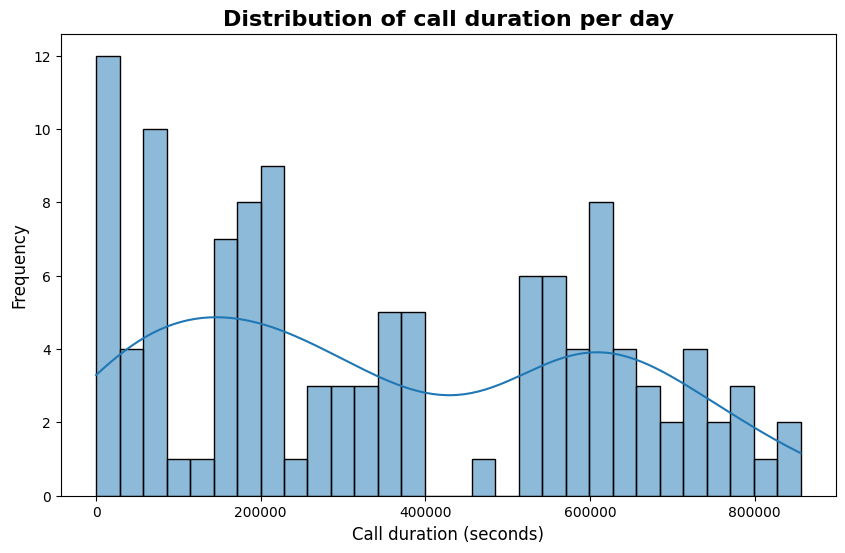

In [486]:
# Graficar con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(call_duration_per_date['call_duration'], bins=30, kde=True)
plt.title('Distribution of call duration per day', fontsize=16, weight='bold')
plt.xlabel('Call duration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Conclusiones**

- Muestra que la mayoría de las llamadas tienen una duración corta. La mayor frecuencia de llamadas se encuentra en el extremo inferior del espectro de duración de las llamadas, lo que indica que muchas llamadas terminan rápidamente.


- A medida que la duración de las llamadas aumenta, la frecuencia de las llamadas disminuye gradualmente. 


- Aunque la frecuencia disminuye con la duración, hay varios picos y valles en la distribución.


- Aunque son menos frecuentes, todavía hay algunas llamadas que tienen una duración considerablemente larga.


- Finalmente la línea suave que se superpone al histograma muestra la tendencia general de la distribución de la duración de las llamadas.

In [487]:
# Calcular las métricas descriptivas: media, mediana, y desviación estándar. 
# Que resumen los datos y facilitan la comprensión de la información
print(f'La media de la duración de la llamada sin incluir '
      f'el tiempo de espera es: {round(df_telecom_dataset_cleaned_filtered["call_duration"].mean()/60)} minutos')
print(f'La mediana de la duración de la llamada sin incluir ' 
      f'el tiempo de espera es: {round(df_telecom_dataset_cleaned_filtered["call_duration"].median()/60)} minutos') 
print(f'La desviación estándar de la duración de la llamada sin incluir '
      f'el tiempo de espera es: {round(df_telecom_dataset_cleaned_filtered["call_duration"].std()/60)} minutos') 

La media de la duración de la llamada sin incluir el tiempo de espera es: 17 minutos
La mediana de la duración de la llamada sin incluir el tiempo de espera es: 2 minutos
La desviación estándar de la duración de la llamada sin incluir el tiempo de espera es: 68 minutos


In [488]:
# Calcular la duración total de las llamadas para cada día
total_call_duration_per_date = df_telecom_dataset_cleaned_filtered.groupby(
    'recovery_date')['total_call_duration'].sum().reset_index()

# Imprimir una muestra de los datos
total_call_duration_per_date.head()

,recovery_date,total_call_duration
0,2019-08-01,487
1,2019-08-02,1424
2,2019-08-03,149
3,2019-08-04,9492
4,2019-08-05,13215


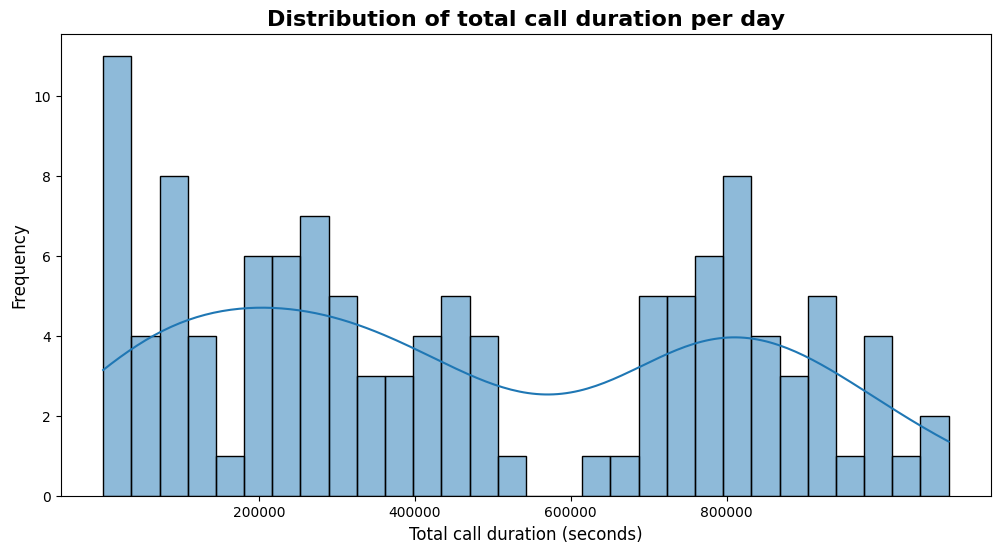

In [489]:
# Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(total_call_duration_per_date['total_call_duration'], bins=30, kde=True)

plt.title('Distribution of total call duration per day', fontsize=16, weight='bold')
plt.xlabel('Total call duration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([200000, 400000, 600000, 800000])
plt.show()

**Conclusiones**

- La mayoría de los días tienen una duración total de llamadas que varían entre 0 y 200000 segundos, con una frecuencia máxima de 10 días. Esto sugiere que es común tener una carga de llamadas dentro de este rango en un día específico.


- Aunque hay una disminución en la frecuencia de días con duración total de llamadas entre 200000 y 400000 segundos, se observa un aumento en la frecuencia de días con duración total de llamadas entre 400000 y 600000 segundos.


- La frecuencia vuelve a aumentar significativamente para duración total de llamadas entre 800000 y 1000000 segundos. Este pico puede representar días con una demanda excepcionalmente alta de llamadas, lo cual podría ser relevante para la gestión de personal.


- Finalmente la curva de densidad suavizada superpuesta al histograma muestra una tendencia general de la distribución, con picos alrededor de 200000 y 800000 segundos. Estos picos reflejan los puntos donde la duración total de llamadas son más frecuentes.



In [490]:
# Calcular las métricas descriptivas: media, mediana, y desviación estándar. 
# Que resumen los datos y facilitan la comprensión de la información
print(f'La media de la duración de la llamada sin incluir '
      f'el tiempo de espera es: {round(df_telecom_dataset_cleaned_filtered["total_call_duration"].mean()/60)} minutos')
print(f'La mediana de la duración de la llamada sin incluir ' 
      f'el tiempo de espera es: {round(df_telecom_dataset_cleaned_filtered["total_call_duration"].median()/60)} minutos') 
print(f'La desviación estándar de la duración de la llamada sin incluir '
      f'el tiempo de espera es: {round(df_telecom_dataset_cleaned_filtered["total_call_duration"].std()/60)} minutos') 

La media de la duración de la llamada sin incluir el tiempo de espera es: 22 minutos
La mediana de la duración de la llamada sin incluir el tiempo de espera es: 5 minutos
La desviación estándar de la duración de la llamada sin incluir el tiempo de espera es: 80 minutos


# ¿Cuál es? el promedio de la duración de llamadas / el promedio de la duración total de llamadas

In [491]:
# Calcular el promedio de la duración de las llamadas
print(f"El promedio de la duración de las llamadas (sin incluir el tiempo de espera) es: "
      f"{df_telecom_dataset_cleaned_filtered['call_duration'].mean():.2f} segundos")

El promedio de la duración de las llamadas (sin incluir el tiempo de espera) es: 1010.94 segundos


In [492]:
# Calcular el promedio de la duración total de las llamadas
print(f"El promedio de la duración total de las llamadas (incluido el tiempo de espera) es: "
      f"{df_telecom_dataset_cleaned_filtered['total_call_duration'].mean():.2f} segundos")

El promedio de la duración total de las llamadas (incluido el tiempo de espera) es: 1323.15 segundos


In [493]:
# Calcular el promedio de la duración de las llamadas para cada mes
average_call_duration_per_month = df_telecom_dataset_cleaned_filtered.groupby(
    'recovery_month')['call_duration'].mean().reset_index()

# Imprimir los datos
average_call_duration_per_month

,recovery_month,call_duration
0,2019-08,1615.950298
1,2019-09,1291.798824
2,2019-10,1030.000609
3,2019-11,829.446891


In [494]:
# Calcular el promedio de la duración total de las llamadas para cada mes
average_total_call_duration_per_month = df_telecom_dataset_cleaned_filtered.groupby(
    'recovery_month')['total_call_duration'].mean().reset_index()

# Imprimir los datos
average_total_call_duration_per_month

,recovery_month,total_call_duration
0,2019-08,2100.265739
1,2019-09,1695.230580
2,2019-10,1367.243214
3,2019-11,1069.220540


In [495]:
# Calcular el promedio de la duración de las llamadas para cada día
average_call_duration_per_date = df_telecom_dataset_cleaned_filtered.groupby(
    'recovery_date')['call_duration'].mean().reset_index()

# Imprimir una muestra de los datos
average_call_duration_per_date.head()

,recovery_date,call_duration
0,2019-08-01,27.166667
1,2019-08-02,160.333333
2,2019-08-03,38.000000
3,2019-08-04,580.615385
4,2019-08-05,759.800000


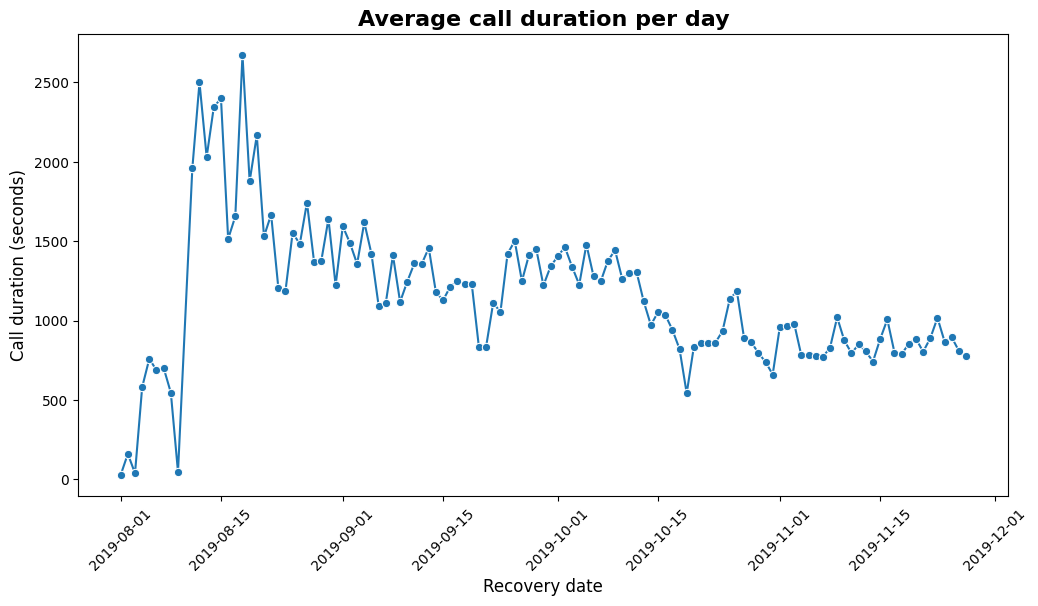

In [496]:
# Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_call_duration_per_date, x='recovery_date', y='call_duration', marker='o')

plt.title('Average call duration per day', fontsize=16, weight='bold')
plt.xlabel('Recovery date', fontsize=12)
plt.ylabel('Call duration (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Conclusiones**

- La gráfica muestra un notable aumento en la duración promedio de llamadas a mediados de agosto de 2019, alcanzando un pico de más de 2500 segundos. Este aumento repentino podría estar relacionado con un evento específico que provocó un mayor tiempo de conversación por llamada.


- Después del pico de agosto, se observa una tendencia general a la baja en la duración promedio de las llamadas, con algunas fluctuaciones menores.


- Hacia finales de noviembre de 2019, la duración promedio de las llamadas parece estabilizarse en un rango de entre 500 y 1000 segundos.


- Finalmente a lo largo del período analizado, hay fluctuaciones diarias en la duración promedio de las llamadas, aunque la tendencia general es a la baja. Estas fluctuaciones podrían estar relacionadas con diferentes factores como la carga de trabajo diaria o la disponibilidad de operadores.

In [497]:
# Calcular el promedio de la duración total de las llamadas para cada día
average_total_call_duration_per_date = df_telecom_dataset_cleaned_filtered.groupby(
    'recovery_date')['total_call_duration'].mean().reset_index()

# Imprimir una muestra de los datos
average_total_call_duration_per_date.head()

,recovery_date,total_call_duration
0,2019-08-01,81.166667
1,2019-08-02,237.333333
2,2019-08-03,49.666667
3,2019-08-04,730.153846
4,2019-08-05,881.000000


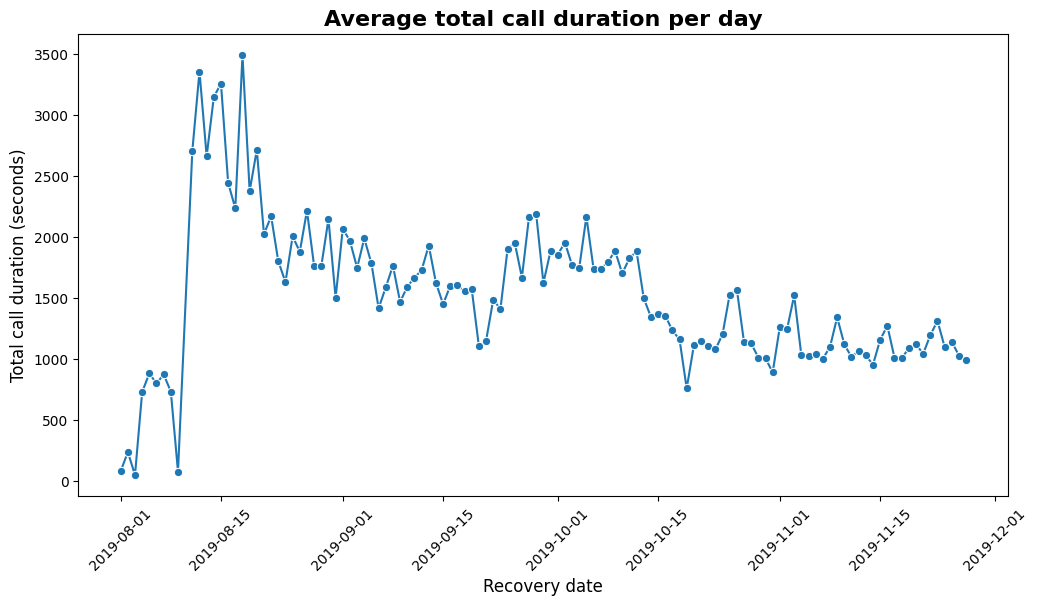

In [498]:
# Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_total_call_duration_per_date, x='recovery_date', y='total_call_duration', marker='o')

plt.title('Average total call duration per day', fontsize=16, weight='bold')
plt.xlabel('Recovery date', fontsize=12)
plt.ylabel('Total call duration (seconds)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Conclusiones**

- La gráfica muestra un aumento significativo en la duración total promedio de las llamadas a mediados de agosto de 2019, alcanzando un pico de aproximadamente 3500 segundos.


- Después del pico de agosto, se observa una tendencia general a la baja en la duración total promedio de las llamadas, con fluctuaciones. Esta tendencia podría indicar una disminución en la actividad o en la duración de las llamadas a medida que pasa el tiempo desde el evento inicial.


- Hacia finales de noviembre de 2019, la duración total promedio de las llamadas parece estabilizarse en un rango de entre 1000 y 1500 segundos por día. Esto estabilización sugiere que la duración total de las llamadas se ha normalizado y se mantiene relativamente constante durante este período.


- Finalmente a lo largo del período analizado, hay fluctuaciones diarias en la duración total promedio de las llamadas. Estas fluctuaciones podrían estar influenciadas por diversos factores como la carga de trabajo diario o la disponibilidad de operadores.

# ¿Cuál es el porcentaje de llamadas perdidas por operador?

In [499]:
# Calcular el porcentaje de llamadas perdidas por operador
df_telecom_dataset_cleaned_filtered['missed_call_rate'] = df_telecom_dataset_cleaned_filtered.groupby(
    'operator_id')['is_missed_call'].transform(lambda x: x.sum() / x.count() * 100)

# Imprimir una muestra de los datos
df_telecom_dataset_cleaned_filtered.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,recovery_month,recovery_date,missed_call_rate
0,166377,2019-08-04 17:00:00-04:00,out,True,880022,True,3,0,5,2019-08,2019-08-04,41.428571
1,166377,2019-08-04 17:00:00-04:00,out,True,880020,True,1,0,1,2019-08,2019-08-04,30.000000
2,166377,2019-08-04 17:00:00-04:00,out,True,880020,False,1,10,18,2019-08,2019-08-04,30.000000
3,166377,2019-08-04 17:00:00-04:00,out,False,880022,True,3,0,25,2019-08,2019-08-04,41.428571
4,166377,2019-08-04 17:00:00-04:00,out,False,880020,False,2,3,29,2019-08,2019-08-04,30.000000


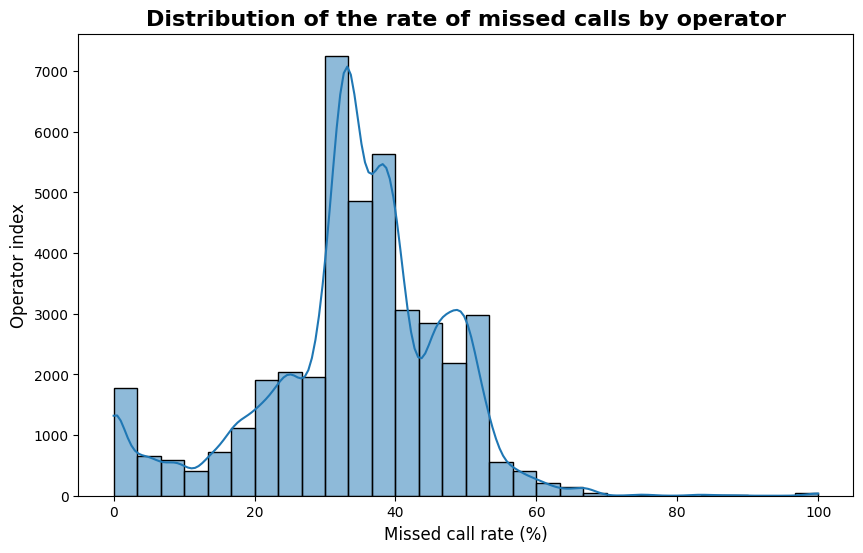

In [500]:
# Graficar con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_telecom_dataset_cleaned_filtered['missed_call_rate'], kde=True, bins=30)

plt.title('Distribution of the rate of missed calls by operator', fontsize=16, weight='bold')
plt.xlabel('Missed call rate (%)', fontsize=12)
plt.ylabel('Operator index', fontsize=12)
plt.show()

**Conclusiones**

- La mayor frecuencia de tasas de llamadas perdidas se encuentra en el rango de 30% a 40%. Esto sugiere que muchos operadores tienen una tasa de llamadas perdidas dentro de este rango, lo que podría ser un punto crítico para mejorar.


- La distribución es sesgada a la derecha, lo que significa que hay operadores con tasas de llamadas perdidas más altas, aunque son menos comunes. A medida que la tasa de llamadas perdidas aumenta, la frecuencia disminuye.


- Hay una frecuencia significativa de operadores con tasas de llamadas perdidas menores al 30%, lo que indica que algunos operadores logran mantener una baja tasa de llamadas perdidas.


- Finalmente la variabilidad en las tasas de llamadas perdidas entre operadores es notable, lo que podría ser consecuencia de diferencias en la carga de trabajo o habilidades de los operadores. 

# ¿Cuál es el tiempo de espera promedio para llamadas entrantes?

In [501]:
# Filtrar las llamadas entrantes
df_incoming_calls = df_telecom_dataset_cleaned_filtered[df_telecom_dataset_cleaned_filtered['direction'] == 'in']

# Calcular el tiempo de espera promedio para llamadas entrantes
avg_wait_time_incoming_calls = df_incoming_calls['total_call_duration'].mean()
print(f"El tiempo de espera promedio para llamadas entrantes es: {avg_wait_time_incoming_calls:.2f} segundos")

El tiempo de espera promedio para llamadas entrantes es: 847.87 segundos


In [502]:
# Filtrar las llamadas salientes
df_outgoing_calls = df_telecom_dataset_cleaned_filtered[df_telecom_dataset_cleaned_filtered['direction'] == 'out']

# Calcular el tiempo de espera promedio para llamadas salientes
avg_wait_time_outgoing_calls = df_outgoing_calls['total_call_duration'].mean()
print(f"El tiempo de espera promedio para llamadas salientes es: {avg_wait_time_outgoing_calls:.2f} segundos")

El tiempo de espera promedio para llamadas salientes es: 1532.28 segundos


In [503]:
# Calcular el tiempo de espera promedio para todas las llamadas
avg_wait_time_all_calls = df_telecom_dataset_cleaned_filtered['total_call_duration'].mean()
print(f"El tiempo de espera promedio para todas las llamadas es: {avg_wait_time_all_calls:.2f} segundos")

El tiempo de espera promedio para todas las llamadas es: 1323.15 segundos


In [504]:
# Calcular el porcentaje de llamadas entrantes
percentage_incoming_calls = (df_telecom_dataset_cleaned_filtered[df_telecom_dataset_cleaned_filtered[
    'direction'] == 'in'].shape[0] / df_telecom_dataset_cleaned_filtered.shape[0]) * 100

# Calcular el porcentaje de llamadas salientes
percentage_outgoing_calls = (df_telecom_dataset_cleaned_filtered[df_telecom_dataset_cleaned_filtered[
    'direction'] == 'out'].shape[0] / df_telecom_dataset_cleaned_filtered.shape[0]) * 100

# Imprimir los resultados
print(f"Porcentaje de llamadas entrantes: {percentage_incoming_calls:.2f}%")
print(f"Porcentaje de llamadas salientes: {percentage_outgoing_calls:.2f}%")

Porcentaje de llamadas entrantes: 30.56%
Porcentaje de llamadas salientes: 69.44%


In [505]:
# Calcular el tiempo de espera para cada llamada
df_telecom_dataset_cleaned_filtered['wait_time'] = df_telecom_dataset_cleaned_filtered[
    'total_call_duration'] - df_telecom_dataset_cleaned_filtered['call_duration']

# Calcular el tiempo de espera promedio por operador
avg_wait_time_per_operator = df_telecom_dataset_cleaned_filtered.groupby('operator_id')['wait_time'].transform('mean')

# Asignar el tiempo de espera promedio a cada llamada en el DataFrame
df_telecom_dataset_cleaned_filtered['avg_wait_time'] = avg_wait_time_per_operator

# Imprimir una muestra de los datos
df_telecom_dataset_cleaned_filtered.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,recovery_month,recovery_date,missed_call_rate,wait_time,avg_wait_time
0,166377,2019-08-04 17:00:00-04:00,out,True,880022,True,3,0,5,2019-08,2019-08-04,41.428571,5,53.971429
1,166377,2019-08-04 17:00:00-04:00,out,True,880020,True,1,0,1,2019-08,2019-08-04,30.000000,1,14.000000
2,166377,2019-08-04 17:00:00-04:00,out,True,880020,False,1,10,18,2019-08,2019-08-04,30.000000,8,14.000000
3,166377,2019-08-04 17:00:00-04:00,out,False,880022,True,3,0,25,2019-08,2019-08-04,41.428571,25,53.971429
4,166377,2019-08-04 17:00:00-04:00,out,False,880020,False,2,3,29,2019-08,2019-08-04,30.000000,26,14.000000


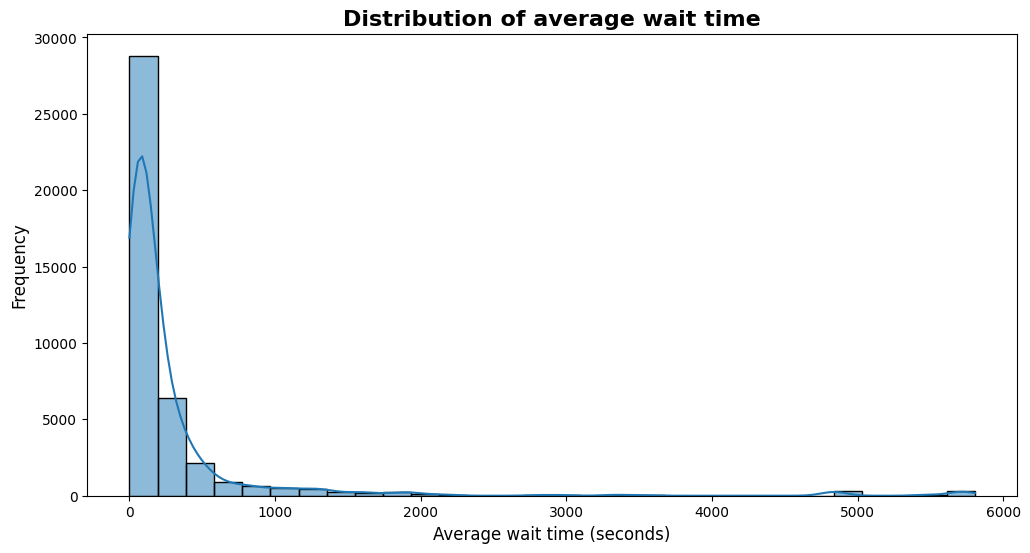

In [506]:
# Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.histplot(df_telecom_dataset_cleaned_filtered['avg_wait_time'], bins=30, kde=True)

plt.title('Distribution of average wait time', fontsize=16, weight='bold')
plt.xlabel('Average wait time (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Conclusiones**

- La mayor frecuencia de tiempos de espera promedio se encuentra en el rango de 0 a 1000 segundos, con un pico significativo en el intervalo de 0 a 500 segundos.


- La distribución esta fuertemente sesgada a la derecha, lo que significa que hay algunos tiempos de espera promedio que son significativamente más largos, aunque son menos comunes. La frecuencia disminuye bruscamente a medida que aumentan los tiempos de espera.


- Aunque son pocos, existen casos de tiempos de espera promedio superiores a 2000 segundos. Estos outliers pueden indicar problemas en ciertos momentos o días específicos donde los tiempos de espera se incrementaron significativamente.


- Finalmente la concentración de la mayor parte de los datos en el extremo inferior del espectro de tiempos de espera sugiere que, en general, el tiempo de espera promedio es bastante eficiente. 

# Operadores ineficaces pueden ser aquellos con tiempos de espera promedio altos o aquellos que manejan un menor número de llamadas en comparación con otros operadores. Operadores eficaces pueden ser aquellos con tiempos de espera promedio bajos o aquellos que manejan un mayor número de llamadas en comparación con otros operadores. (Identifica a los operadores ineficaces / Identificar a los operadores eficaces)

In [507]:
# Calcular el tiempo de espera promedio por operador
avg_wait_time_per_operator = df_telecom_dataset_cleaned_filtered.groupby('operator_id')[
    'total_call_duration'].mean().reset_index()
avg_wait_time_per_operator.columns = ['operator_id', 'avg_wait_time']

# Imprimir una muestra de los datos
avg_wait_time_per_operator.head()

,operator_id,avg_wait_time
0,879896,650.743590
1,879898,1598.579646
2,880020,126.250000
3,880022,270.357143
4,880026,964.428571


In [508]:
# Calcular el número total de llamadas por operador
total_calls_per_operator = df_telecom_dataset_cleaned_filtered['operator_id'].value_counts().reset_index()
total_calls_per_operator.columns = ['operator_id', 'total_calls']

# Imprimir una muestra de los datos
total_calls_per_operator.head()

,operator_id,total_calls
0,901884,323
1,901880,300
2,893804,289
3,885876,283
4,887276,267


In [509]:
# Combinar el tiempo de espera promedio y el número total de llamadas por operador
operator_performance = avg_wait_time_per_operator.merge(total_calls_per_operator, on='operator_id')

# Ordenar por tiempo de espera promedio descendente
operator_performance = operator_performance.sort_values(by='avg_wait_time', ascending=False)

# Imprimir una muestra de los datos
operator_performance.head()

,operator_id,avg_wait_time,total_calls
28,885876,20258.787986,283
29,885890,18908.268775,253
551,925922,17158.205479,73
583,929428,9741.476923,65
317,908640,9556.558140,43


In [510]:
# Definir el umbral basado en el percentil 75
threshold = operator_performance['avg_wait_time'].quantile(0.75)

# Identificar a los operadores ineficaces por tiempo de espera promedio
inefficient_operators_wait_time = operator_performance[operator_performance['avg_wait_time'] > threshold]

# Imprimir una muestra de los datos
inefficient_operators_wait_time.head()

,operator_id,avg_wait_time,total_calls
28,885876,20258.787986,283
29,885890,18908.268775,253
551,925922,17158.205479,73
583,929428,9741.476923,65
317,908640,9556.558140,43


In [511]:
# Definir un umbral para el número total de llamadas
average_calls = operator_performance['total_calls'].mean()

# Identificar a los operadores ineficaces por número total de llamadas
inefficient_operators_calls = operator_performance[operator_performance['total_calls'] < average_calls]

# # Imprimir una muestra de los datos
inefficient_operators_calls.head()

,operator_id,avg_wait_time,total_calls
442,919302,8516.515152,33
1053,965544,7982.307692,13
447,919362,6324.642857,28
860,945318,6299.468750,32
848,945288,6072.888889,36


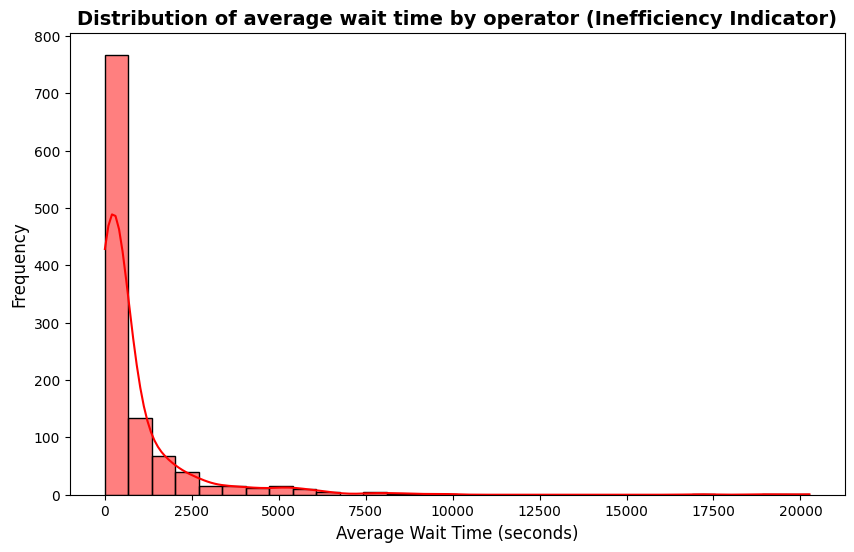

In [512]:
# Graficar con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(operator_performance['avg_wait_time'], bins=30, kde=True, color='red')
plt.title('Distribution of average wait time by operator (Inefficiency Indicator)', fontsize=14, weight='bold')
plt.xlabel("Average Wait Time (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**Conclusiones**

- Aunque algunos operadores mantienen tiempos de espera bajos, todavía caen dentro del espectro de ineficiencia. Esto sugiere que incluso los operadores con tiempos de espera más cortos podrían mejorar aún más.


- La distribución sesgada a la derecha indica que hay operadores con tiempos de espera promedio significativamente más altos, mostrando claros problemas de ineficiencia. Estos operadores necesitan atención y mejoras inmediatas.


- Hay operadores con tiempos de espera promedio muy altos, cercanos a 600 segundos o más. Estos outliers representan casos graves de ineficiencia y deben ser investigados para identificar las causas.


- Finalmente la curva de densidad refuerza la presencia de ineficiencias en la mayoría de los operadores. La cola izquierda indica que, aunque menos frecuentes, hay operadores con serios problemas de tiempo de espera.


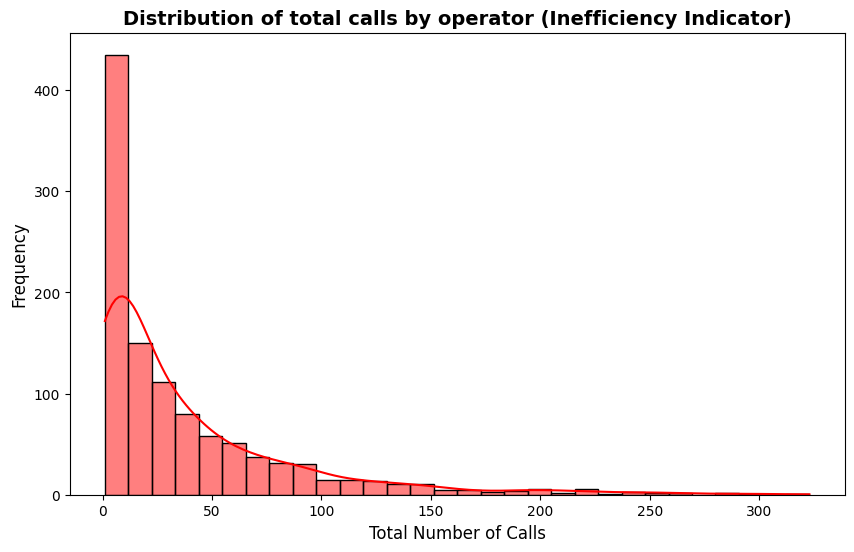

In [513]:
# Graficar con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(operator_performance['total_calls'], bins=30, kde=True, color='red')
plt.title("Distribution of total calls by operator (Inefficiency Indicator)", fontsize=14, weight='bold')
plt.xlabel("Total Number of Calls", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

** Conclusiones**

- La mayoría de los operadores manejan un número bajo de llamadas, concentrado en el rango de 0 a 50 llamadas. Esto indica una posible ineficiencia en la distribición de llamadas, ya que muchos operadores no están alcanzando su real capacidad.


- La distribución esta fuertemente sesgada a la derecha, lo que sugiere que hay una mayoría de operadores con un bajo número total de llamadas. Esto refleja problemas en la asignación de llamadas, donde la carga de trabajo no está distribuida equitativamente entre los operadores.


- Existen algunos operadores que manejan un número mucho mayor de llamadas, superando las 300 llamadas. Estos outliers pueden representar casos extremos de ineficiencia en la gestión de la carga de trabajo.


- Finalmente la curva de densidad sobrepuesta al histograma refuerza la observación de que la mayoría de los operadores manejan un número bajo de llamadas.

In [514]:
# Identificar a los operadores eficaces por tiempo de espera promedio
efficient_operators_wait_time = operator_performance[operator_performance['avg_wait_time'] < threshold]

# Imprimir una muestra de los datos
efficient_operators_wait_time.head()

,operator_id,avg_wait_time,total_calls
950,952466,838.000000,3
893,947620,832.148936,47
174,899972,830.906250,32
895,947638,825.837209,43
718,937888,824.958333,96


In [515]:
# Identificar a los operadores eficaces por número total de llamadas
efficient_operators_calls = operator_performance[operator_performance['total_calls'] > average_calls]

# Imprimir una muestra de los datos 
efficient_operators_calls.head()

,operator_id,avg_wait_time,total_calls
28,885876,20258.787986,283
29,885890,18908.268775,253
551,925922,17158.205479,73
583,929428,9741.476923,65
317,908640,9556.558140,43


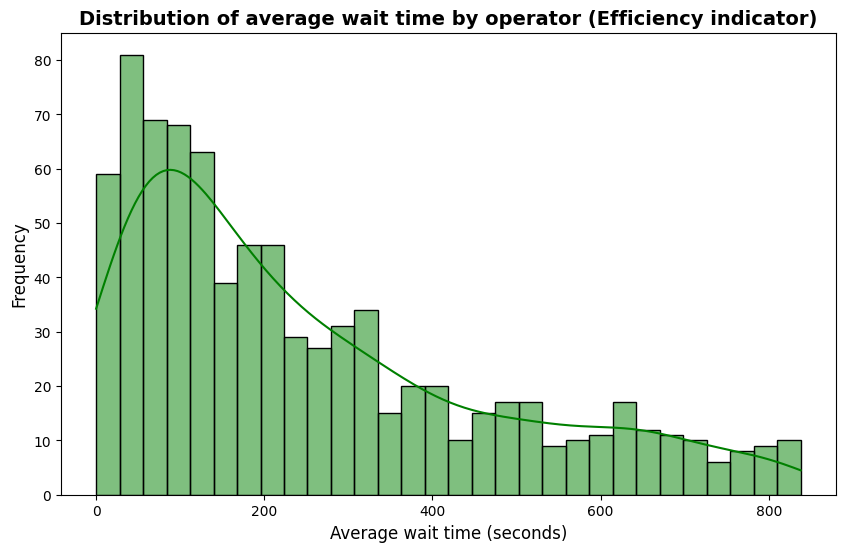

In [516]:
# Graficar con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(efficient_operators_wait_time['avg_wait_time'], bins=30, kde=True, color='green')
plt.title('Distribution of average wait time by operator (Efficiency indicator)', fontsize=14, weight='bold')
plt.xlabel("Average wait time (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

**Conclusiones**

- La mayoría de los operadores tienen tiempos de espera promedio en el rango de 0 a 200 segundos, lo que indica una alta eficiencia en la gestión de las llamadas.


- La distribución está sesgada a la derecha, lo que indica que aunque la mayoría de los operadores tienen tiempos de espera bajos, hay algunos casos con tiempos de espera más altos. Sin embargo, estos casos son menos comunes, lo que refuerza la eficiencia general del grupo de operadores. 


- La presencia de una alta concentración de operadores con tiempos de espera promedio bajos sugiere que, en general, el equipo es bastante eficiente.


- Finalmente aunque existen algunos operadores con tiempos de espera promedio más altos, estos son menos frecuentes. La baja frecuencia de estos outliers refuerza la eficiencia del grupo, indicando que la mayoría de los operadores están trabajando de manera efectiva.

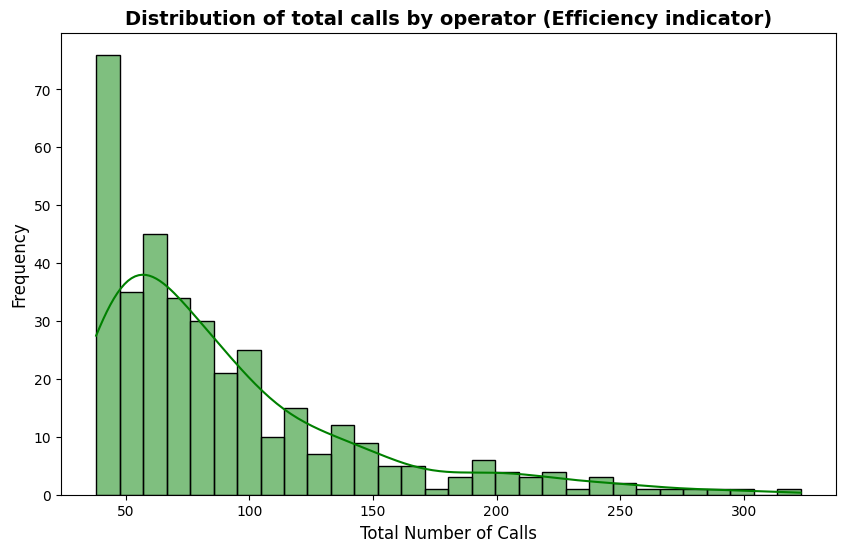

In [517]:
# Graficar con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(efficient_operators_calls['total_calls'], bins=30, kde=True, color='green')
plt.title('Distribution of total calls by operator (Efficiency indicator)', fontsize=14, weight='bold')
plt.xlabel("Total Number of Calls", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

** Conclusiones** 

- La mayor parte de los operadores manejan un número moderado de llamadas, concentrado en el rango de 0 a 100 llamadas. Esto sugiere que muchos operadores son eficientes al manejar un volumen razonable de llamadas sin comprometer la calidad del servicio. 


- La distribución está sesgada a la derecha, lo que indica que la mayoría de los operadores manejan un número más bajo de llamadas, mientras que unos pocos manejan un número significativamente mayor. Esto refuerza la eficiencia general, ya que la mayor parte de los operadores puede gestionar un número adecuado de llamadas.


- Los operadores que manejan un número mayor de llamadas, en el rango de 100 a más de 300 llamadas, muestran una alta capacidad operativa.


- Finalmente la curva de densidad superpuesta al histograma refuerza la observación de que la mayoría de los operadores manejan un número menor de llamadas. Sin embargo, la presencia de operadores con un número mayor de llamadas muestra una distribución equilibrada en términos de eficiencia operativa.

# ¿Cuál es el número de usuarios suscritos a cada plan tarifario?

In [518]:
# Calcular el número de usuarios por plan tarifario
users_per_tariff_plan = df_telecom_clients['tariff_plan'].value_counts().reset_index()
users_per_tariff_plan.columns = ['tariff_plan', 'user_count']

# Imprimir los datos
users_per_tariff_plan

,tariff_plan,user_count
0,C,395
1,B,261
2,A,76


# ¿Cuál es el número de usuarios por fecha de inicio / por mes de inicio?

In [519]:
# Calcular el número de usuarios por fecha de inicio
users_per_start_date = df_telecom_clients['date_start'].value_counts().reset_index()
users_per_start_date.columns = ['date_start', 'user_count']

# Imprimir una muestra de los datos
users_per_start_date.head()

,date_start,user_count
0,2019-09-24,24
1,2019-10-09,20
2,2019-10-07,19
3,2019-08-29,18
4,2019-09-18,18


In [520]:
# Calcular el número de usuarios por mes de inicio
users_per_start_month = df_telecom_clients['month_start'].value_counts().reset_index()
users_per_start_month.columns = ['month_start', 'user_count']

# Ordenar los resultados por mes de inicio
users_per_start_month = users_per_start_month.sort_values(by='month_start')

# Imprimir los datos
users_per_start_month

,month_start,user_count
0,2019-08,258
2,2019-09,231
1,2019-10,243


- *Métricas Cruzadas*

# ¿Cuál es la duración promedio de llamadas por plan tarifario?

In [521]:
# Calcular la duración de llamadas por plan tarifario
df_tariff_plan = df_telecom_dataset_cleaned_filtered.merge(df_telecom_clients, on='user_id', how='inner')
avg_call_duration_per_tariff = df_tariff_plan.groupby('tariff_plan')['call_duration'].mean().reset_index()

# Imprimir los datos
avg_call_duration_per_tariff

,tariff_plan,call_duration
0,A,1746.827806
1,B,716.761319
2,C,691.480521


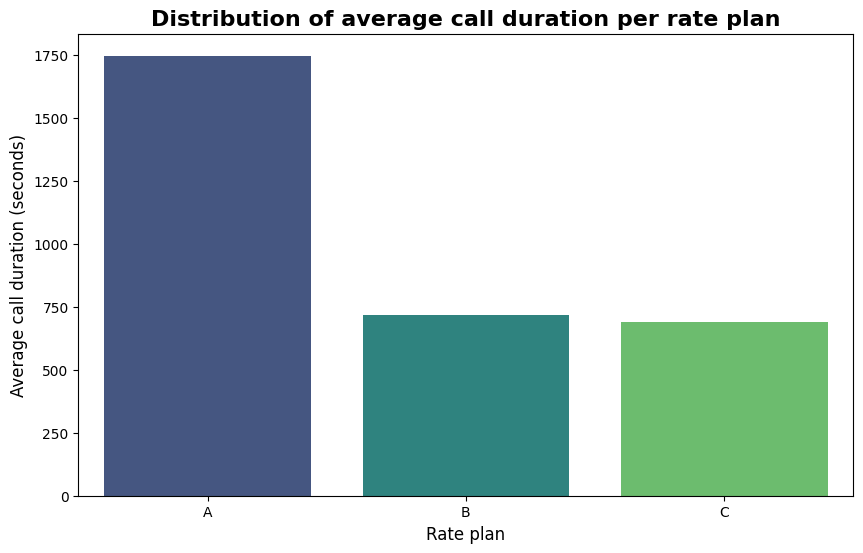

In [522]:
# Graficar con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    x='tariff_plan', y='call_duration', hue='tariff_plan', data=avg_call_duration_per_tariff, palette='viridis', legend=False)
plt.title('Distribution of average call duration per rate plan', fontsize=16, weight='bold')
plt.xlabel('Rate plan', fontsize=12)
plt.ylabel('Average call duration (seconds)', fontsize=12)
plt.show()

**Conclusiones**


- La gráfica muestra que el plan de tarifa A tiene la mayor duración promedio de llamadas, con aproximadamente 1750 segundos. Esto indica que los usuarios del plan A tienden a realizar llamadas significativamente más largas en comparación con los otros planes de tarifa.


- Los planes de tarifa B y C tienen una duración promedio de llamadas similar, alrededor de 750 segundos. Esto sugiere que los usuarios de estos dos planes tienen comportamientos de llamada comparables en términos de duración.


- Finalmente la diferencia en la duración promedio de las llamadas entre el plan A y los planes B y C es notable. Los usuarios del plan A parecen tener necesidades o comportamientos diferentes que resultan en llamadas más largas.

# ¿Cuál es el número de llamadas perdidas por plan tarifario?

In [523]:
# Calcular el número de llamadas perdidas por plan tarifario
missed_calls_per_tariff = df_tariff_plan.groupby('tariff_plan')['is_missed_call'].sum().reset_index()

# Imprimir los datos
missed_calls_per_tariff

,tariff_plan,is_missed_call
0,A,4320
1,B,4971
2,C,4818


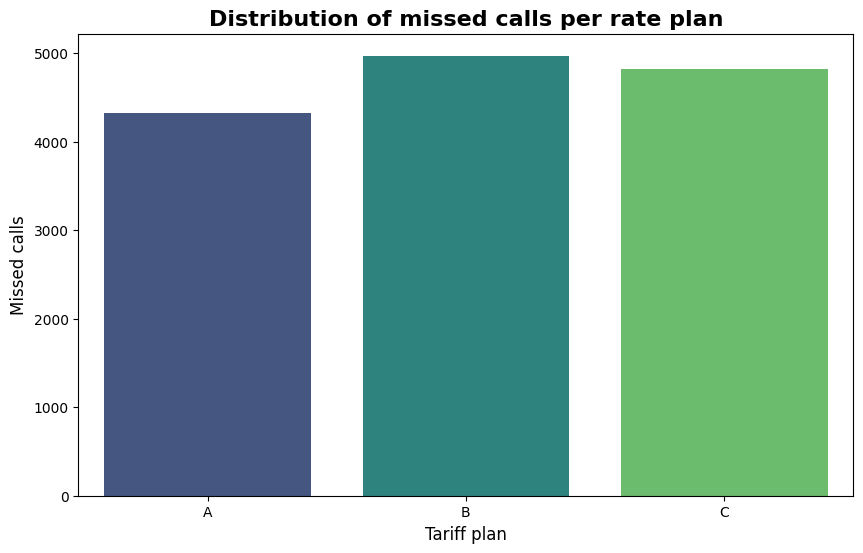

In [524]:
# Graficar con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='tariff_plan', y='is_missed_call', hue='tariff_plan', data=missed_calls_per_tariff, palette='viridis', legend=False)
plt.title('Distribution of missed calls per rate plan', fontsize=16, weight='bold')
plt.xlabel('Tariff plan', fontsize=12)
plt.ylabel('Missed calls', fontsize=12)
plt.show()

**Conclusiones**

- La gráfica muestra que el plan de tarifa B tiene el mayor número de llamadas perdidas, con un poco más de 5000 llamadas perdidas. Esto podría indicar problemas específicos relacionados con este plan, como ineficiencia en la atención al cliente o características del plan que dificultan la finalización de las llamadas.


- El plan de tarifa C también muestra un número considerable de llamadas perdidas, ligeramente inferior a 5000. Aunque es menor que el plan B, sigue siendo un indicador significativo de ineficiencia que debe ser abordado.


- El plan de tarifa A tiene un poco más de 4000 llamadas perdidas, que es el número más bajo entre los tres planes, pero aún representa un problema considerable. La eficiencia en este plan es mejor en comparación con los planes B y C, pero todavía hay margen de mejora.


- Finalmente la comparación entre los tres planes de tarifa sugiere que los usuarios del plan B tienen más probabilidades de enfrentar problemas que resulten en llamadas perdidas, seguidos por los usuarios del plan C y, por los del plan A. Esta distribución podría estar influenciada por diferentes factores como la complejidad del plan, la calidad del servicio, o la demografía de los usuarios.

# ¿Cuál es el total de llamadas realizadas por plan tarifario y mes?

In [525]:
# Calcular el total de llamadas realizadas por plan tarifario y mes
calls_per_month_tariff = df_tariff_plan.groupby(['tariff_plan', 'recovery_month'])['calls_count'].sum().reset_index()

# Imprimir los datos
calls_per_month_tariff

,tariff_plan,recovery_month,calls_count
0,A,2019-08,22379
1,A,2019-09,89945
2,A,2019-10,147301
3,A,2019-11,120629
4,B,2019-08,10526
5,B,2019-09,22080
6,B,2019-10,49237
7,B,2019-11,56851
8,C,2019-08,2247
9,C,2019-09,32750


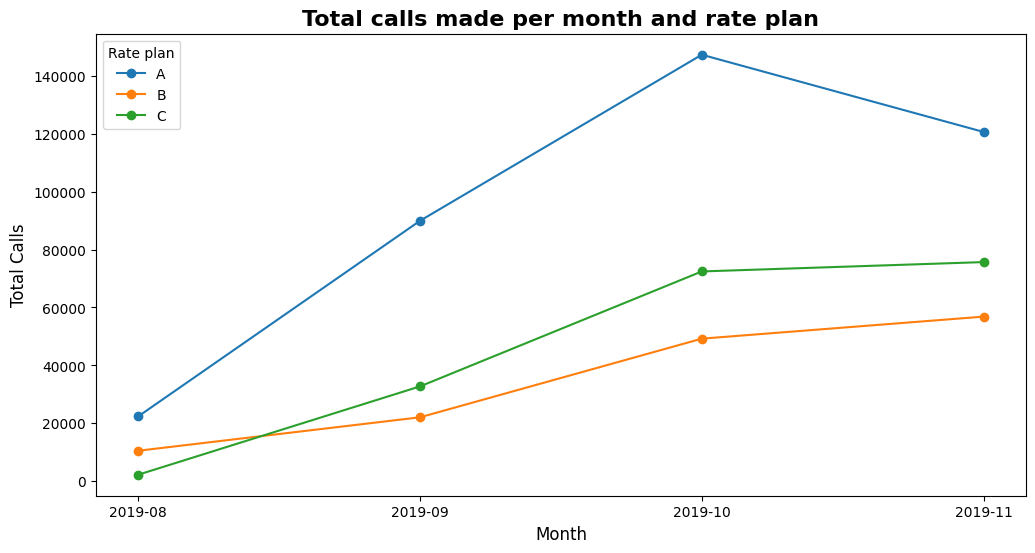

In [526]:
# Graficar con Matplotlib
plt.figure(figsize=(12, 6))

for tariff_plan in calls_per_month_tariff['tariff_plan'].unique():
    data = calls_per_month_tariff[calls_per_month_tariff['tariff_plan'] == tariff_plan]
    plt.plot(data['recovery_month'].astype(str), data['calls_count'], marker='o', label=tariff_plan)

plt.title('Total calls made per month and rate plan', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Calls', fontsize=12)
plt.legend(title='Rate plan')
plt.show()

**Conclusiones**

- La gráfica muestra un aumento general en el número total de llamadas realizadas desde agosto hasta octubre de 2019 para todos los planes de tarifa. Este aumento puede deberse a factores estacionales, que incrementaron la actividad de llamadas durante estos meses. 


- En octubre de 2019, todos los planes de tarifa alcanzan su punto máximo en el número total de llamadas realizadas. Este pico podría indicar un evento particular que motivó a los usuarios a hacer más llamadas en ese mes en específico.


- Después de alcanzar su punto máximo en octubre, el plan de tarifa A muestra una ligera disminución en el número total de llamadas realizadas en noviembre de 2019.


- El plan de tarifa B muestra un aumento constante en el número total de llamadas realizadas a lo largo de los cuatro meses analizados. Esto sugiere un crecimiento sostenido en la actividad de llamadas para este plan de tarifa.


- Finalmente el plan de tarifa C muestra un aumento desde agosto hasta octubre de 2019, seguido de una estabilización en noviembre.

- **Pruebas de hipótesis**

**Responder a preguntas de datos con la prueba T DE STUDENT**

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

1. **Prueba de hipótesis sobre el tiempo de espera promedio** entre operadores eficaces e ineficaces.

**Hipótesis:**

    H0 = No hay diferencia significativa en el tiempo de espera promedio entre operadores eficaces e ineficaces.
    
    HA = Existe una diferencia significativa en el tiempo de espera promedio entre operadores eficaces e ineficaces.

Para esta sección y después de generar los datos necesarios que se ocupan para hacer la prueba T DE STUDENT mediante la aplicación de la función abajo desarrollada concluyó que para esta primera hipótesis de que **no hay diferencia significativa en el tiempo de espera promedio entre operadores eficaces e ineficaces** es falsa por lo tanto podemos rechazar la hipótesis nula.

In [527]:
# Realizar la prueba t para comparar las medias del tiempo de espera promedio
t_stat, p_value = stats.ttest_ind(
    efficient_operators_wait_time['avg_wait_time'], 
    inefficient_operators_wait_time['avg_wait_time']
)

# Mostrar resultados
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -27.86283920212391
P-value: 1.9089442029033493e-129


In [528]:
# Nivel de significancia
alpha = 0.05  

# Interpretar los resultados

if p_value < alpha:
    print("Podemos rechazar la hipotesis nula. Hay una diferencia significativa en el tiempo de espera promedio.")
else:
    print("No podemos rechazar la hipotesis nula. No hay una diferencia significativa en el tiempo de espera promedio.")

Podemos rechazar la hipotesis nula. Hay una diferencia significativa en el tiempo de espera promedio.


2. **Prueba de hipótesis sobre el número de llamadas** entre operadores eficaces e ineficaces.

**Hipótesis:**

    H0 = No hay diferencia significativa en el número de llamadas entre operadores eficaces e ineficaces.
    
    HA = Existe una diferencia significativa en el número de llamadas entre operadores eficaces e ineficaces.

Para esta sección y después de generar los datos necesarios que se ocupan para hacer la prueba T DE STUDENT mediante la aplicación de la función abajo desarrollada concluyó que para esta primera hipótesis de que **no hay diferencia significativa en el número de llamadas entre operadores eficaces e ineficaces**  es falsa por lo tanto podemos rechazar la hipótesis nula.

In [529]:
# Realizar la prueba t para comparar las medias del número total de llamadas
t_stat_calls, p_value_calls = stats.ttest_ind(
    efficient_operators_calls['total_calls'], 
    inefficient_operators_calls['total_calls']
)

# Mostrar resultados
print(f"T-statistic: {t_stat_calls}")
print(f"P-value: {p_value_calls}")

T-statistic: 37.86875105682871
P-value: 5.759314242384402e-201


In [530]:
# Interpretar los resultados
if p_value_calls < alpha:
    print("Podemos rechazar la hipotesis nula. Hay una diferencia significativa en el número de llamadas.")
else:
    print("No podemos rechazar la hipotesis nula. No hay una diferencia significativa en el número de llamadas.")

Podemos rechazar la hipotesis nula. Hay una diferencia significativa en el número de llamadas.


- **Pruebas de correlación**

1. Correlación entre la duración de llamadas y tiempo de espera

    **Objetivo: Determinar si las llamadas más largas tienden a tener tiempos de espera más prolongados.**

Coeficiente de correlación de Spearman: 0.27288479912659713
Existe una correlación positiva entre la duración de las llamadas y el tiempo de espera.


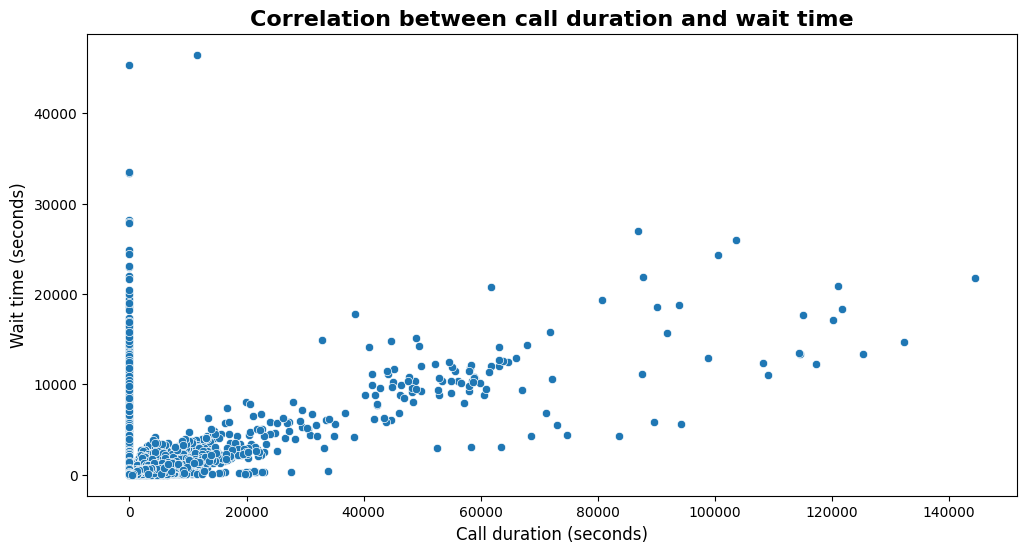

In [531]:
# Calcular el coeficiente de correlación de Spearman
spearman_corr = stats.spearmanr(df_telecom_dataset_cleaned_filtered['call_duration'], 
                                df_telecom_dataset_cleaned_filtered['wait_time']).correlation
print(f"Coeficiente de correlación de Spearman: {spearman_corr}")

# Interpretar el resultado
if spearman_corr == 1:
    print("Existe una correlación positiva perfecta entre la duración de las llamadas y el tiempo de espera.")
elif spearman_corr == -1:
    print("Existe una correlación negativa perfecta entre la duración de las llamadas y el tiempo de espera.")
elif spearman_corr > 0:
    print("Existe una correlación positiva entre la duración de las llamadas y el tiempo de espera.")
elif spearman_corr < 0:
    print("Existe una correlación negativa entre la duración de las llamadas y el tiempo de espera.")
else:
    print("No existe una correlación significativa entre la duración de las llamadas y el tiempo de espera.")

# Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_telecom_dataset_cleaned_filtered, x='call_duration', y='wait_time')

plt.title('Correlation between call duration and wait time', fontsize=16, weight='bold')
plt.xlabel('Call duration (seconds)', fontsize=12)
plt.ylabel('Wait time (seconds)', fontsize=12)
plt.show()

**Conclusión**

Aunque la correlación no es muy fuerte, hay una tendencia a que las llamadas más largas estén asociadas con tiempos de espera más prolongados. Esto podría indicar que hay otros factores en juego que también afectan el tiempo de espera.



2. Correlación entre número de llamadas y llamadas perdidas

    **Objetivo: Determinar si los operadores que manejan más llamadas tienen más probabilidades de perderlas.**

Coeficiente de correlación de Spearman: 0.9282364806391677
Existe una correlación positiva entre el número de llamadas y las llamadas perdidas.


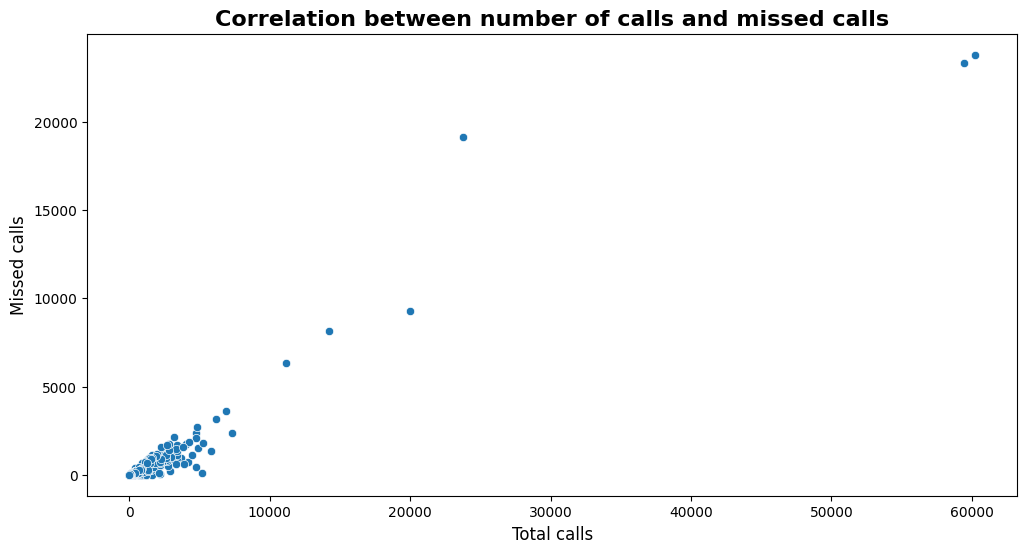

In [532]:
# Calcular el número de llamadas y las llamadas perdidas por operador
calls_per_operator = df_telecom_dataset_cleaned_filtered.groupby('operator_id')['calls_count'].sum().reset_index()

missed_calls_per_operator = df_telecom_dataset_cleaned_filtered[df_telecom_dataset_cleaned_filtered[
    'is_missed_call']].groupby('operator_id')['calls_count'].sum().reset_index()

# Fusionar los resultados para tener una sola tabla
merged_data = pd.merge(calls_per_operator, missed_calls_per_operator, on='operator_id', suffixes=('_total', '_missed'))

# Calcular el coeficiente de correlación de Spearman
spearman_corr = stats.spearmanr(merged_data['calls_count_total'], merged_data['calls_count_missed']).correlation
print(f"Coeficiente de correlación de Spearman: {spearman_corr}")

# Interpretar el resultado
if spearman_corr == 1:
    print("Existe una correlación positiva perfecta entre el número de llamadas y las llamadas perdidas.")
elif spearman_corr == -1:
    print("Existe una correlación negativa perfecta entre el número de llamadas y las llamadas perdidas.")
elif spearman_corr > 0:
    print("Existe una correlación positiva entre el número de llamadas y las llamadas perdidas.")
elif spearman_corr < 0:
    print("Existe una correlación negativa entre el número de llamadas y las llamadas perdidas.")
else:
    print("No existe una correlación significativa entre el número de llamadas y las llamadas perdidas.")

# Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='calls_count_total', y='calls_count_missed')

plt.title('Correlation between number of calls and missed calls', fontsize=16, weight='bold')
plt.xlabel('Total calls', fontsize=12)
plt.ylabel('Missed calls', fontsize=12)
plt.show()

**Conclusión**

Hay una correlación muy fuerte y positiva entre el número de llamadas y las llamadas perdidas. Esto significa que los operadores que manejan más llamadas tienden a perder perder más llamadas. Este hallazgo encontrado es crucial para entender y optimizar la gestión de llamadas por parte de los operadores y podría ser útil para implementar estrategias que reduzcan la perdida de llamadas, especialmente entre los operadores que manejan un alto volumen de llamadas.

3. Correlación entre duración de llamadas y número de llamadas

    **Objetivo: Evaluar si los operadores que tienen llamadas mas largas, son los que menor cantidad de llamadas contestan.**

Coeficiente de correlación de Spearman: 0.8288000264649873
Existe una correlación positiva entre la duración de las llamadas y el número de llamadas.


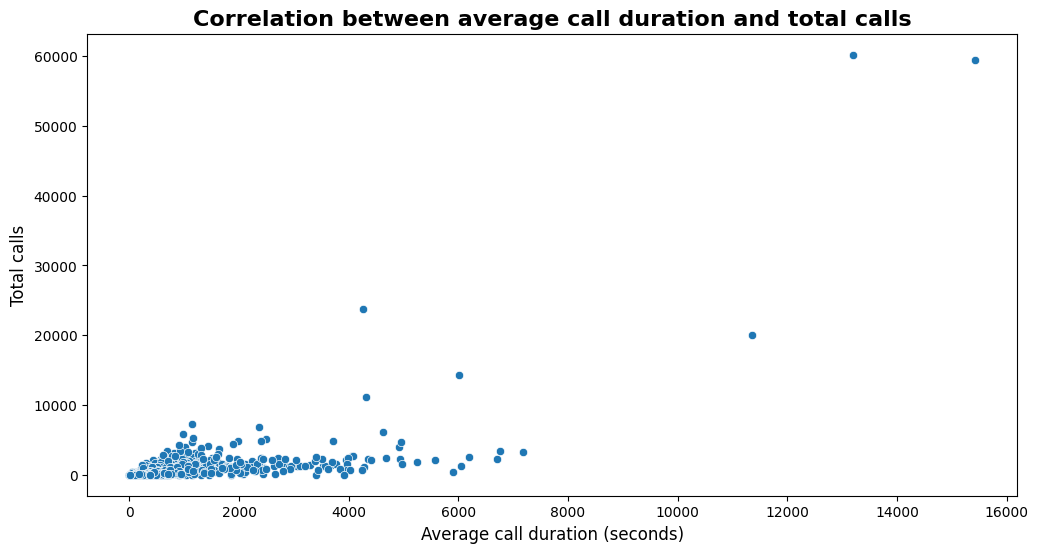

In [533]:
# Calcular la duración promedio de las llamadas por operador
avg_call_duration_per_operator = df_telecom_dataset_cleaned_filtered.groupby('operator_id')[
    'call_duration'].mean().reset_index()
avg_call_duration_per_operator.columns = ['operator_id', 'call_duration_avg']

# Calcular el número total de llamadas por operador
total_calls_per_operator = df_telecom_dataset_cleaned_filtered.groupby('operator_id')['calls_count'].sum().reset_index()
total_calls_per_operator.columns = ['operator_id', 'calls_count_total']

# Fusionar los resultados para tener una sola tabla
merged_data = pd.merge(avg_call_duration_per_operator, total_calls_per_operator, on='operator_id')

# Calcular el coeficiente de correlación de Spearman 
spearman_corr = stats.spearmanr(merged_data['call_duration_avg'], merged_data['calls_count_total']).correlation
print(f"Coeficiente de correlación de Spearman: {spearman_corr}")

# Interpretar el resultado
if spearman_corr == 1:
    print("Existe una correlación positiva perfecta entre la duración de las llamadas y el número de llamadas.")
elif spearman_corr == -1:
    print("Existe una correlación negativa perfecta entre la duración de las llamadas y el número de llamadas.")
elif spearman_corr > 0:
    print("Existe una correlación positiva entre la duración de las llamadas y el número de llamadas.")
elif spearman_corr < 0:
    print("Existe una correlación negativa entre la duración de las llamadas y el número de llamadas.")
else:
    print("No existe una correlación significativa entre la duración de las llamadas y el número de llamadas.")

# Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='call_duration_avg', y='calls_count_total')

plt.title('Correlation between average call duration and total calls', fontsize=16, weight='bold')
plt.xlabel('Average call duration (seconds)', fontsize=12)
plt.ylabel('Total calls', fontsize=12)
plt.show()

**Conclusión**

Hay una correlación muy fuerte y positiva entre la duración de las llamadas y el número de llamadas. Esto significa que los operadores que tienen llamadas más largas tienden a manejar una mayor cantidad de llamadas. Esto puede ser valioso para optimizar la gestión de las llamadas y entender mejor el desempeño de los operadores.

4. Correlación entre el número de llamadas contestadas y el tiempo de espera promedio

    **Objetivo: Determinar si los operadores que contestan más llamadas también tienden a tener tiempos de espera más cortos.**

Coeficiente de correlación de Spearman: 0.7798525055180331
Existe una correlación positiva entre el número de llamadas contestadas y el tiempo de espera promedio.


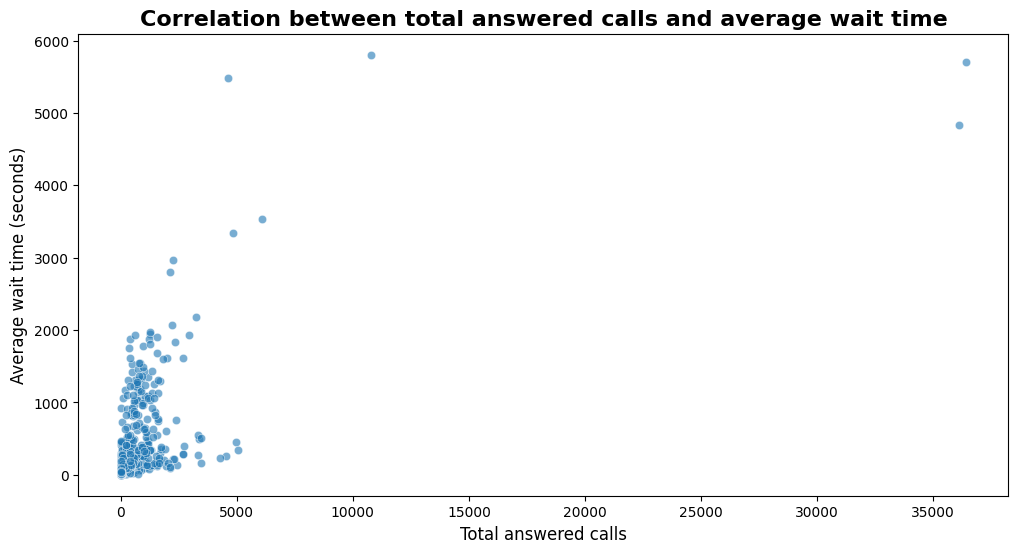

In [534]:
# Calcular el número total de llamadas contestadas por operador
answered_calls_per_operator = df_telecom_dataset_cleaned_filtered[df_telecom_dataset_cleaned_filtered[
    'is_missed_call'] == False].groupby('operator_id')['calls_count'].sum().reset_index()
answered_calls_per_operator.columns = ['operator_id', 'answered_calls_total']

# Fusionar los resultados para tener una sola tabla 
merged_data = pd.merge(df_telecom_dataset_cleaned_filtered[['operator_id', 'avg_wait_time']].drop_duplicates(), 
                       answered_calls_per_operator, on='operator_id')

# Calcular el coeficiente de correlación de Spearman 
spearman_corr = stats.spearmanr(merged_data['answered_calls_total'], merged_data['avg_wait_time']).correlation

print(f"Coeficiente de correlación de Spearman: {spearman_corr}")

# Interpretar el resultado 
if spearman_corr == 1:
    print("Existe una correlación positiva perfecta entre el número de llamadas contestadas y el tiempo de espera promedio.")
elif spearman_corr == -1:
    print("Existe una correlación negativa perfecta entre el número de llamadas contestadas y el tiempo de espera promedio.")
elif spearman_corr > 0:
    print("Existe una correlación positiva entre el número de llamadas contestadas y el tiempo de espera promedio.")
elif spearman_corr < 0:
    print("Existe una correlación negativa entre el número de llamadas contestadas y el tiempo de espera promedio.")
else:
    print("No existe una correlación significativa entre el número de llamadas contestadas y el tiempo de espera promedio.")

# Graficar con Seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x='answered_calls_total', y='avg_wait_time', alpha=0.6)

plt.title('Correlation between total answered calls and average wait time', fontsize=16, weight='bold')
plt.xlabel('Total answered calls', fontsize=12)
plt.ylabel('Average wait time (seconds)', fontsize=12)
plt.show()

**Conclusión**

Existe una correlación fuerte y positiva entre el número de llamadas contestadas y el tiempo de espera promedio. Esto sugiere que los operadores que contestan más llamadas tienden a tener tiempos de espera más largos. Lo cual es importante para entender la dinámica de gestión de las llamadas y podría ser útil para mejorar la eficiencia de los operadores.

**ETAPA 4. Escribe una conclusión**

**Haz recomendaciones básicas a los supervisores y las supervisores sobre el trabajo de los operadores menos eficaces**

El análisis ha revelado varias áreas de ineficiencia entre algunos operadores, destacando tiempos de espera prolongados, altas tasas de llamadas perdidas, y un número menor de llamadas gestionadas por ciertos operadores. Estos indicadores de ineficiencia pueden afectar la calidad del servicio y la satisfacción del cliente. Es fundamental abordar estas áreas para mejorar la eficiencia operativa general.


**Recomendaciones para supervisores y supervisoras**

- Proporcionar capacitación adicional a los operadores que muestran indicadores de ineficiencia. Enfocar la capacitación en técnicas de manejo de llamadas, gestión del tiempo y habilidades de comunicación.


- Implementar programas de desarrollo continuo para mantener actualizadas las habilidades de todos los operadores y fomentar una cultura de aprendizaje y mejora constante.


- Asignar mentores experimentados a los operadores menos eficaces para proporcionar orientación y apoyo personalizado.


- Realizar sesiones regulares de retroalimentación constructiva para discutir áreas de mejora y establecer planes de acción concretos.


- Implementar un sistema de monitoreo continuo para evaluar el desempeño de los operadores en tiempo real.


- Realizar evaluaciones periódicas del desempeño para medir el progreso y ajustar las estrategias de capacitación y apoyo según sea necesario.


- Revisar y optimizar los procesos operativos para reducir los tiempos de espera y mejorar la distribución de las llamadas.


- Implementar mejoras tecnológicas que puedan aumentar la eficiencia, como sistemas de enrutamiento inteligente de llamadas.


- Reconocer y recompensar los logros y mejoras de los operadores menos eficaces para motivarlos y reforzar el comportamiento positivo.


- Fomentar una cultura de trabajo en equipo y colaborativa, donde los operadores se sientan apoyados y motivados para alcanzar sus objetivos de desempeño.